In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [5]:
data_files = [file for file in os.listdir("./201719Data")]
all_data = pd.DataFrame()
for file in data_files:
    df = pd.read_csv("./201719Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("201719Minneapolis.csv", index=False)

In [2]:
all_data = pd.read_csv("./201719Minneapolis.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,7,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data.head()

,tripduration,start_time,end_time,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,bike type,Unnamed: 0
0,1172.0,2018-09-02 11:35:35.0700,2018-09-02 11:55:07.8170,96,Marshall Street NE & 8th Ave NE,44.995348,-93.266854,6,11th Street & Hennepin,44.975288,-93.278817,2.0,Subscriber,1990.0,2.0,Classic,NaN
1,190.0,2018-09-05 17:24:45.6140,2018-09-05 17:27:56.3430,6,11th Street & Hennepin,44.975288,-93.278817,147,9th Street N & Hawthorne Ave,44.977314,-93.277761,2.0,Subscriber,1989.0,0.0,Classic,NaN
2,325.0,2018-09-05 18:14:11.8830,2018-09-05 18:19:37.2890,46,IDS Center,44.975675,-93.272200,102,West 15th Street & Willow,44.968237,-93.281991,2.0,Customer,1978.0,1.0,Classic,NaN
3,1940.0,2018-09-05 20:52:23.2250,2018-09-05 21:24:43.8820,102,West 15th Street & Willow,44.968237,-93.281991,101,West 36th Street & Bryant Ave S,44.937750,-93.291200,2.0,Subscriber,1964.0,1.0,Classic,NaN
4,570.0,2018-09-07 08:01:18.9700,2018-09-07 08:10:49.0790,8,YWCA Downtown,44.972217,-93.276435,56,7th Street & 4th Ave S,44.974970,-93.266684,2.0,Customer,1954.0,2.0,Classic,NaN


In [4]:
del all_data['start station id']
del all_data['start station latitude']
del all_data['start station longitude']
del all_data['end station id']
del all_data['end station latitude']
del all_data['end station longitude']
del all_data['Unnamed: 0']

In [5]:
all_data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type
0,1172.0,2018-09-02 11:35:35.0700,2018-09-02 11:55:07.8170,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic
1,190.0,2018-09-05 17:24:45.6140,2018-09-05 17:27:56.3430,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic
2,325.0,2018-09-05 18:14:11.8830,2018-09-05 18:19:37.2890,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic
3,1940.0,2018-09-05 20:52:23.2250,2018-09-05 21:24:43.8820,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic
4,570.0,2018-09-07 08:01:18.9700,2018-09-07 08:10:49.0790,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic


In [6]:
all_data['start_time'] = pd.to_datetime(all_data["start_time"])
all_data['end_time'] = pd.to_datetime(all_data["end_time"])
all_data['year'] = all_data["start_time"].dt.year
all_data['month'] = all_data["start_time"].dt.month

In [7]:
all_data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month
0,1172.0,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018,9
1,190.0,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018,9
2,325.0,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018,9
3,1940.0,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018,9
4,570.0,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018,9


In [8]:
all_data['start_hour'] = all_data['start_time'].dt.hour
all_data['day_of_week'] = all_data['start_time'].dt.day_name()

In [9]:
all_data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month,start_hour,day_of_week
0,1172.0,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018,9,11,Sunday
1,190.0,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018,9,17,Wednesday
2,325.0,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018,9,18,Wednesday
3,1940.0,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018,9,20,Wednesday
4,570.0,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018,9,8,Friday


In [56]:
# no data for columns 5, 7, 8, 9 for 2017 as the data was not collected until 2018

In [10]:
all_data['tripduration'] = all_data['tripduration']/60
all_data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month,start_hour,day_of_week
0,19.533333,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018,9,11,Sunday
1,3.166667,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018,9,17,Wednesday
2,5.416667,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018,9,18,Wednesday
3,32.333333,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018,9,20,Wednesday
4,9.500000,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018,9,8,Friday


In [12]:
all_data['tripduration'].describe()

count    1.231848e+06
mean     5.735270e+01
std      1.119394e+03
min      1.000000e+00
25%      7.033333e+00
50%      1.320000e+01
75%      2.556667e+01
max      1.892467e+05
Name: tripduration, dtype: float64

In [13]:
#Based on the pricing system I'd expect the majority of rides to be no longer than 4 hours
no_outliers_data = all_data[all_data['tripduration'] < 240]
no_outliers_data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month,start_hour,day_of_week
0,19.533333,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018,9,11,Sunday
1,3.166667,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018,9,17,Wednesday
2,5.416667,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018,9,18,Wednesday
3,32.333333,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018,9,20,Wednesday
4,9.500000,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018,9,8,Friday


In [14]:
no_outliers_data['tripduration'].describe()

count    1.219322e+06
mean     2.073058e+01
std      2.447654e+01
min      1.000000e+00
25%      6.983333e+00
50%      1.303333e+01
75%      2.506667e+01
max      2.399667e+02
Name: tripduration, dtype: float64

In [137]:
no_outliers_data['usertype'] = no_outliers_data['usertype'].replace({"Member": "Subscriber","Casual": "Customer"})

<ipython-input-137-6fea559c2d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_data['usertype'] = no_outliers_data['usertype'].replace({"Member": "Subscriber","Casual": "Customer"})


In [114]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719MinneapolisCleaned.csv", index=False)

#### Start of data analysis

In [ ]:
### Gender: 0=Unknown, 1=Male, 2=Female

In [3]:
data=pd.read_csv("201719MinneapolisCleaned.csv")
data.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month,start_hour,day_of_week
0,19.533333,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018,9,11,Sunday
1,3.166667,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018,9,17,Wednesday
2,5.416667,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018,9,18,Wednesday
3,32.333333,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018,9,20,Wednesday
4,9.500000,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018,9,8,Friday


RIDER DEMOGRAPHICS

In [4]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [4]:
genders = data['gender'].value_counts().keys().to_list()
counts = data['gender'].value_counts().tolist()

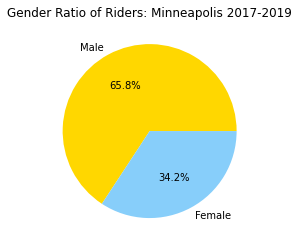

In [7]:
#Gender: 0=Unknown, 1=Male, 2=Female
plt.pie([counts[0], counts[2]], labels=['Male', 'Female'], colors = ['gold', 'lightskyblue'], autopct='%1.1f%%')
plt.title('Gender Ratio of Riders: Minneapolis 2017-2019')
plt.show()
# based on users that provided their gender

In [5]:
users = data['usertype'].value_counts().keys().to_list()
count = data['usertype'].value_counts().to_list()

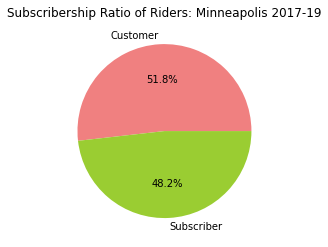

In [8]:
plt.pie(count[0:2], labels=users[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Minneapolis 2017-19")
plt.show()

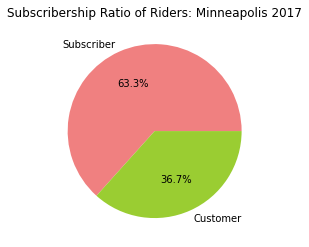

In [8]:
users_17 = df1['usertype'].value_counts().keys().to_list()
count_17 = df1['usertype'].value_counts().to_list()

plt.pie(count_17[0:2], labels=users_17[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Minneapolis 2017")
plt.show()


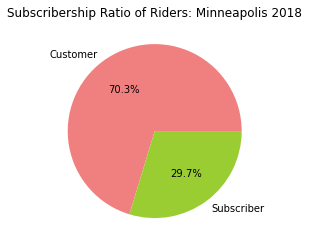

In [10]:
users_18 = df2['usertype'].value_counts().keys().to_list()
count_18 = df2['usertype'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Minneapolis 2018")
plt.show()

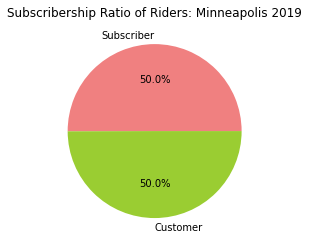

In [12]:
users_19 = df3['usertype'].value_counts().keys().to_list()
count_19 = df3['usertype'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Minneapolis 2019")
plt.show()

In [13]:
data['year']=data['year'].astype(float)
data['age']=data['year']-data['birth year']

In [14]:
data.head()

,tripduration,start_time,end_time,start station name,end station name,bikeid,usertype,birth year,gender,bike type,year,month,start_hour,day_of_week,age
0,19.533333,2018-09-02 11:35:35.070,2018-09-02 11:55:07.817,Marshall Street NE & 8th Ave NE,11th Street & Hennepin,2.0,Subscriber,1990.0,2.0,Classic,2018.0,9,11,Sunday,28.0
1,3.166667,2018-09-05 17:24:45.614,2018-09-05 17:27:56.343,11th Street & Hennepin,9th Street N & Hawthorne Ave,2.0,Subscriber,1989.0,0.0,Classic,2018.0,9,17,Wednesday,29.0
2,5.416667,2018-09-05 18:14:11.883,2018-09-05 18:19:37.289,IDS Center,West 15th Street & Willow,2.0,Customer,1978.0,1.0,Classic,2018.0,9,18,Wednesday,40.0
3,32.333333,2018-09-05 20:52:23.225,2018-09-05 21:24:43.882,West 15th Street & Willow,West 36th Street & Bryant Ave S,2.0,Subscriber,1964.0,1.0,Classic,2018.0,9,20,Wednesday,54.0
4,9.500000,2018-09-07 08:01:18.970,2018-09-07 08:10:49.079,YWCA Downtown,7th Street & 4th Ave S,2.0,Customer,1954.0,2.0,Classic,2018.0,9,8,Friday,64.0


In [15]:
age_dict = dict(zip(data['age'].value_counts().keys().to_list(), data['age'].value_counts().to_list()))
#Remove birth years that don't make sense (any age more than 80 is removed)
cleaned_age = {}
for key in age_dict:
        if(int(key)<=80):
            cleaned_age[int(key)]=age_dict[key]

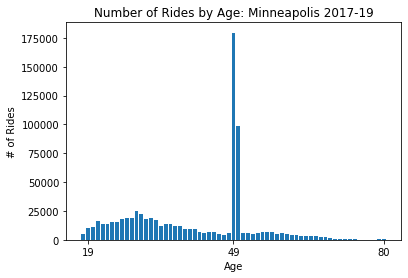

In [20]:
plt.bar(list(cleaned_age.keys()), list(cleaned_age.values()))
plt.xticks((19,49,80))
plt.xlabel("Age")
plt.ylabel("# of Rides")
plt.title("Number of Rides by Age: Minneapolis 2017-19")
plt.show()

In [21]:
birth_dict = dict(zip(data['birth year'].value_counts().keys().to_list(), data['birth year'].value_counts().to_list()))
#Remove birth years that don't make sense (any age more than 80 is removed)
cleaned_birth = {}
for key in birth_dict:
        if(int(key)>=1939):
            cleaned_birth[int(key)]=birth_dict[key]

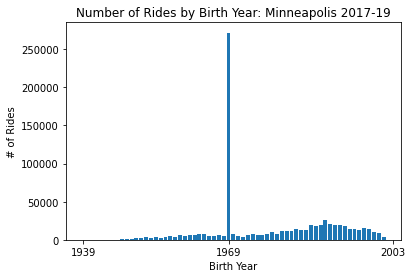

In [23]:
plt.bar(list(cleaned_birth.keys()), list(cleaned_birth.values()))
plt.xticks((1939,1969, 2003))
plt.xlabel("Birth Year")
plt.ylabel("# of Rides")
plt.title("Number of Rides by Birth Year: Minneapolis 2017-19")
plt.show()

RIDES PER YEAR

In [24]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

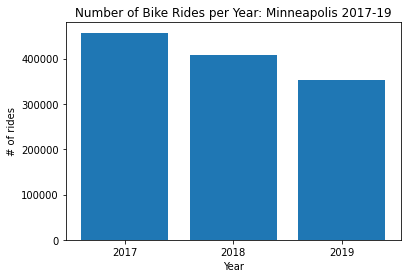

In [25]:
plt.bar(years, rides)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides per Year: Minneapolis 2017-19")
plt.show()

BIKES IN SYSTEM

In [37]:
num_bikes_year =[]
num_bikes2 = len(df2['bikeid'].unique())
num_bikes_year.append(num_bikes2)

In [38]:
num_bikes3 = len(df3['bikeid'].unique())
num_bikes_year.append(num_bikes3)

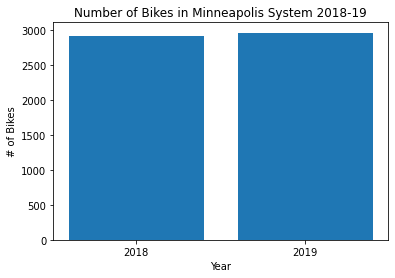

In [39]:
plt.bar([2018, 2019], num_bikes_year)
plt.xticks([2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Minneapolis System 2018-19")
plt.show()

DAYS OF WEEK AND HOURS

In [40]:
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [155948,160023,165606,169107,184538,207284,176816]

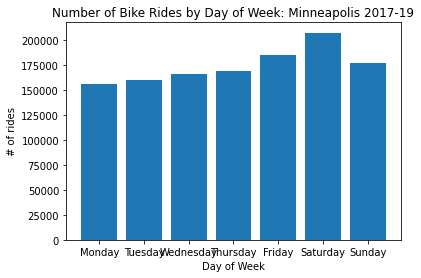

In [41]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: Minneapolis 2017-19")
plt.show()

In [42]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [43]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

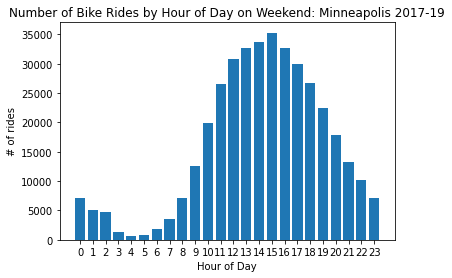

In [44]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Minneapolis 2017-19")
plt.show()

In [45]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

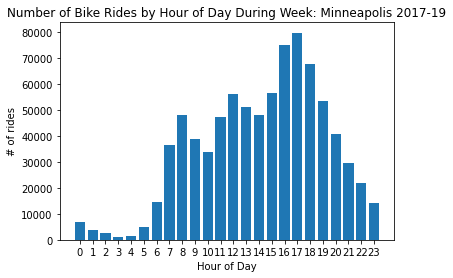

In [47]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Minneapolis 2017-19")
plt.show()

In [48]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [49]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

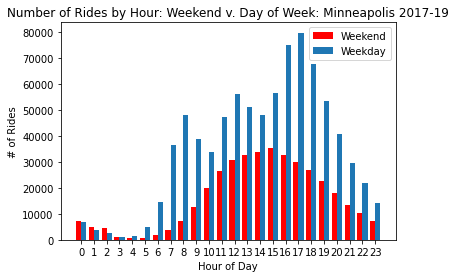

In [50]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Minneapolis 2017-19')
plt.legend(loc = 'best')
plt.show()

MONTHS

In [56]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

In [57]:
months.extend([1,2,3,12])
num_riders.extend([0,0,0,0])

[7, 6, 8, 9, 5, 10, 4, 11, 1, 2, 3, 12]
[254129, 214230, 212682, 179159, 172120, 104681, 65927, 16394, 0, 0, 0, 0]


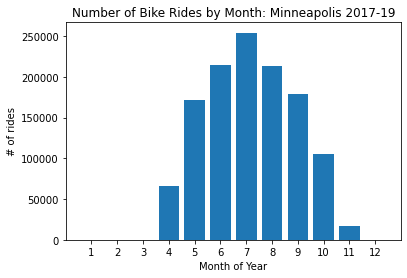

In [58]:
# Bike share shut down from December to March for Winter
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: Minneapolis 2017-19")
plt.show()

START/END STATIONS

In [59]:
#track most common and least common start stations over 3 year period
start_stations = data['start station name'].value_counts().keys().to_list()
num_start = data['start station name'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

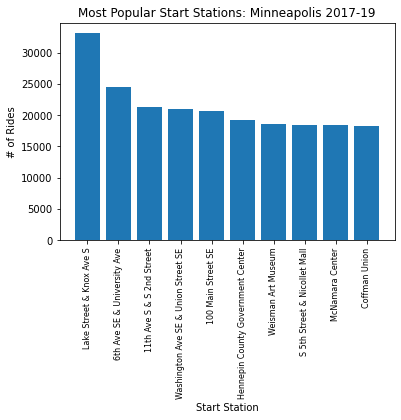

In [60]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: Minneapolis 2017-19")
plt.show()

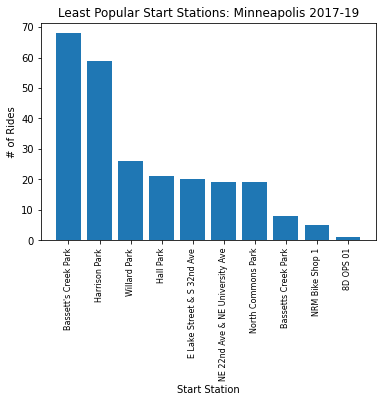

In [61]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Minneapolis 2017-19")
plt.show()

In [62]:
#track most common and least common end stations over 3 year period
end_stations = data['end station name'].value_counts().keys().to_list()
num_end = data['end station name'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

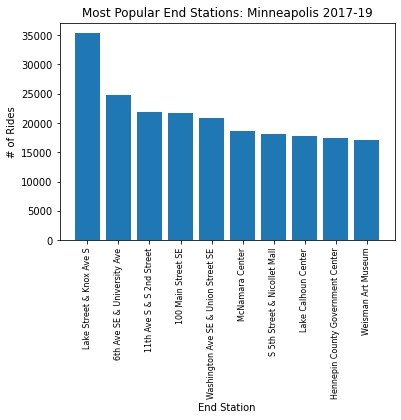

In [63]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Minneapolis 2017-19")
plt.show()

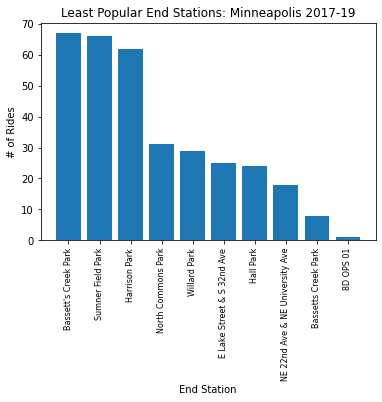

In [64]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Minneapolis 2017-19")
plt.show()

In [65]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


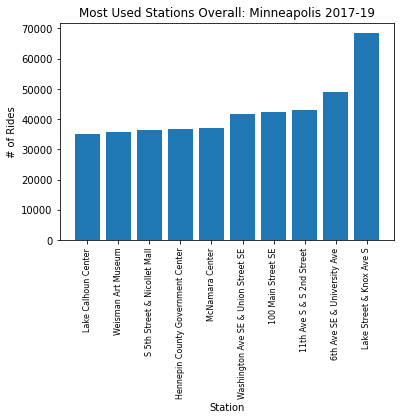

In [66]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: Minneapolis 2017-19")
plt.show()


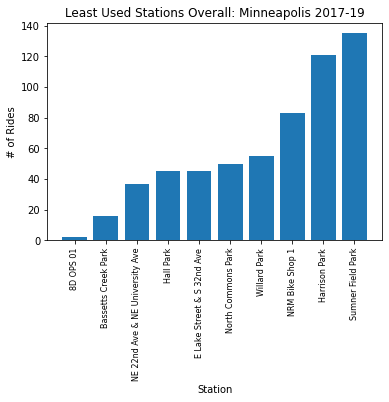

In [67]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Minneapolis 2017-19")
plt.show()

In [68]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['start station name'], df1['end station name']]).unique()))
num_stations.append(stations_2017)

In [69]:
stations_2018 = len(list(pd.concat([df2['start station name'], df2['end station name']]).unique()))
num_stations.append(stations_2018)

In [70]:
stations_2019 = len(list(pd.concat([df3['start station name'], df3['end station name']]).unique()))
num_stations.append(stations_2019)

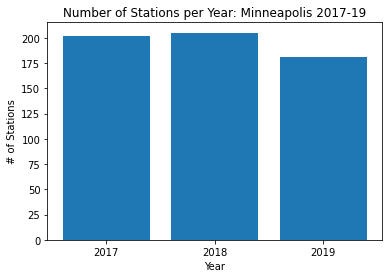

In [71]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Minneapolis 2017-19")
plt.show()

TRIP DURATION

In [72]:
#determine tripduration statistics (min, max, average, std, etc.)
data['tripduration'].describe()

count    1.219322e+06
mean     2.073058e+01
std      2.447654e+01
min      1.000000e+00
25%      6.983333e+00
50%      1.303333e+01
75%      2.506667e+01
max      2.399667e+02
Name: tripduration, dtype: float64

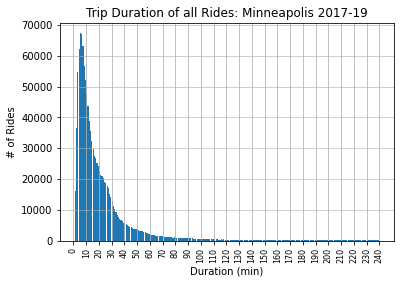

In [73]:
times = data['tripduration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Minneapolis 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

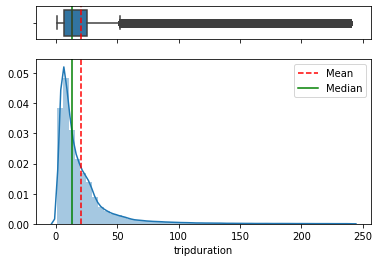

In [74]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['tripduration'].mean()
median=data['tripduration'].median()

sns.boxplot(data['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [75]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['usertype'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [76]:
df_sub['tripduration'].describe()

count    587871.000000
mean         13.365299
std          14.662200
min           1.000000
25%           5.400000
50%           8.933333
75%          15.983333
max         239.933333
Name: tripduration, dtype: float64

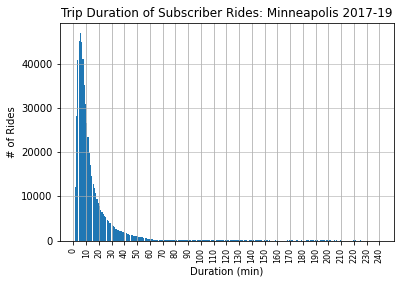

In [77]:
sub_times = df_sub['tripduration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Minneapolis 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

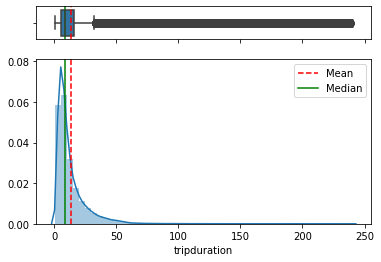

In [78]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['tripduration'].mean()
median=df_sub['tripduration'].median()

sns.boxplot(df_sub['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [79]:
df_cust['tripduration'].describe()

count    631449.000000
mean         27.587532
std          29.311962
min           1.000000
25%          10.316667
50%          19.216667
75%          31.550000
max         239.966667
Name: tripduration, dtype: float64

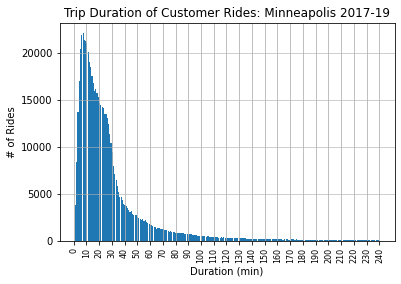

In [81]:
cust_times = df_cust['tripduration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Minneapolis 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

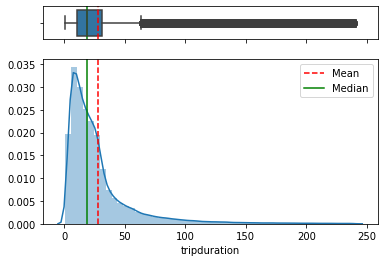

In [82]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['tripduration'].mean()
median=df_cust['tripduration'].median()

sns.boxplot(df_cust['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [83]:
weekend_df['tripduration'].describe()

count    384100.000000
mean         26.537780
std          28.041714
min           1.000000
25%          10.016667
50%          18.666667
75%          31.016667
max         239.950000
Name: tripduration, dtype: float64

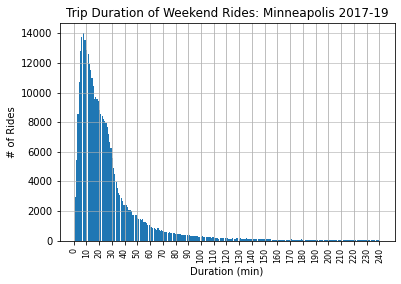

In [85]:
weekend_times = weekend_df['tripduration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Minneapolis 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [86]:
weekday_df['tripduration'].describe()

count    835222.000000
mean         18.059981
std          22.143956
min           1.000000
25%           6.200000
50%          11.016667
75%          21.633333
max         239.966667
Name: tripduration, dtype: float64

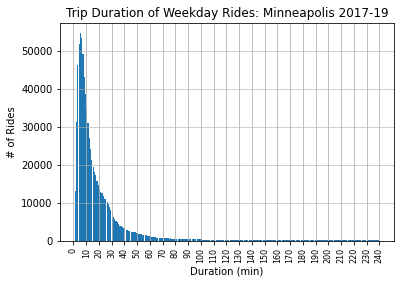

In [87]:
weekday_times = weekday_df['tripduration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Minneapolis 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)